#### About this Dataset

#### Exploratory Data Analysis

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime as dt

# Import US Data
us_videos = pd.read_csv('E:/Github/Data_Exploration/Trending_Youtube_video/USvideos.csv/USvideos.csv')
us_videos_categories = pd.read_json('E:/Github/Data_Exploration/Trending_Youtube_video/US_category_id.json')

# Map Category IDs using the supporting file: US_category_id.json
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}

In [3]:
# First Row
us_videos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# All entries for first-row video
us_videos[us_videos.video_id == "2kyS6SvSYSE"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [5]:
# Category ID will be used to assign categories later, it is not a numeric variable.
us_videos.category_id = us_videos.category_id.astype('category')

# Get Metadata Information
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 16 columns):
video_id                  24951 non-null object
trending_date             24951 non-null object
title                     24951 non-null object
channel_title             24951 non-null object
category_id               24951 non-null category
publish_time              24951 non-null object
tags                      24951 non-null object
views                     24951 non-null int64
likes                     24951 non-null int64
dislikes                  24951 non-null int64
comment_count             24951 non-null int64
thumbnail_link            24951 non-null object
comments_disabled         24951 non-null bool
ratings_disabled          24951 non-null bool
video_error_or_removed    24951 non-null bool
description               24507 non-null object
dtypes: bool(3), category(1), int64(4), object(8)
memory usage: 2.4+ MB


In [6]:
# Summary of Object Variables
us_videos.describe(include=[np.object])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,24951,24951,24951,24951,24951,24951,24951,24507
unique,4881,125,4946,1972,4812,4652,4881,5098
top,H0g4JxKp4fc,17.31.12,Maroon 5 - Wait,ESPN,2018-03-07T17:00:02.000Z,[none],https://i.ytimg.com/vi/H0g4JxKp4fc/default.jpg,Jukin Media Verified (Original) * For licensin...
freq,16,200,18,122,25,1051,16,46


In [7]:
# Most Frequent Category, 24 is
print(categories[24])

Entertainment


In [8]:
# Summary of Boolean Variables
us_videos.select_dtypes(include=[np.bool]).apply(pd.Series.value_counts,dropna=False)

,comments_disabled,ratings_disabled,video_error_or_removed
False,24518,24799,24947
True,433,152,4


In [9]:
# Summary of Numeric Variables
us_videos.describe(percentiles=[.05,.25,.5,.75,.95]).round(1)

,views,likes,dislikes,comment_count
count,24951.0,24951.0,24951.0,24951.0
mean,1343968.8,46985.5,2815.3,5954.5
std,4218124.8,150213.7,34503.7,32214.7
min,549.0,0.0,0.0,0.0
5%,16639.0,133.0,9.0,20.0
25%,128213.5,2598.0,115.0,354.5
50%,380393.0,10745.0,379.0,1165.0
75%,1120025.5,32588.5,1233.0,3655.0
95%,4794933.0,184515.0,7241.5,20422.0
max,149376127.0,3093544.0,1674420.0,1361580.0


In [10]:
counter = 0
for k,v in categories.items():
    print('{:2d}: {:24}'.format(k,v),end=' ')
    counter += 1
    if counter % 4 == 0:
        print()
print('\n{} Categories in Total.'.format(counter))

 1: Film & Animation          2: Autos & Vehicles         10: Music                    15: Pets & Animals           
17: Sports                   18: Short Movies             19: Travel & Events          20: Gaming                   
21: Videoblogging            22: People & Blogs           23: Comedy                   24: Entertainment            
25: News & Politics          26: Howto & Style            27: Education                28: Science & Technology     
29: Nonprofits & Activism    30: Movies                   31: Anime/Animation          32: Action/Adventure         
33: Classics                 34: Comedy                   35: Documentary              36: Drama                    
37: Family                   38: Foreign                  39: Horror                   40: Sci-Fi/Fantasy           
41: Thriller                 42: Shorts                   43: Shows                    44: Trailers                 

32 Categories in Total.


#### Data Preprocessing

In [11]:
# Transform trending_date to datetime date format
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date
us_videos.trending_date.value_counts().sort_index(inplace=True)
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [12]:
# Dataset is sorted by trending_date
pd.Index(us_videos.trending_date).is_monotonic

True

##### Publish Time

In [13]:
# Transforming publish_time to datetime
publish_time = pd.to_datetime(us_videos.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create Variable publish_date
us_videos['publish_date'] = publish_time.dt.date

# Drop publish_time
us_videos.drop('publish_time',axis=1,inplace=True)

#### Days to Trending

In [14]:
# Create New Variable Counting Days to Achieving Trending Status
us_videos['days_to_trending'] = (us_videos.trending_date - us_videos.publish_date).dt.days
us_videos.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    24951.000000
mean        21.628592
std        186.840413
min          0.000000
5%           1.000000
25%          3.000000
50%          4.000000
75%          6.000000
95%         11.000000
max       4215.000000
Name: days_to_trending, dtype: float64

In [15]:
us_videos.set_index(['trending_date','video_id'],inplace=True)
us_videos.head()

title  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
              d380meD0W0M                           I Dare You: GOING BALD!?   

                                   channel_title category_id  \
trending_date video_id                                         
2017-11-14    2kyS6SvSYSE           CaseyNeistat          22   
              1ZAPwfrtAFY        LastWeekTonight          24   
              5qpjK5DgCt4           Rudy Mancuso          23   
              puqaWrEC7tY  Good Mythical Morning          24   
              d380meD0W0M               nigahiga          24   

                                                                        tags  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                                    SHANtell martin   
              1ZAPwfrtAFY  last week tonight trump presidency|"last week ...   
              5qpjK5DgCt4  racist superman|"rudy"|"mancuso"|"king"|"bach"...   
              puqaWrEC7tY  rhett and link|"gmm"|"good mythical morning"|"...   
              d380meD0W0M  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   

                             views   likes  dislikes  comment_count  \
trending_date video_id                                                
2017-11-14    2kyS6SvSYSE   748374   57527      2966          15954   
              1ZAPwfrtAFY  2418783   97185      6146          12703   
              5qpjK5DgCt4  3191434  146033      5339           8181   
              puqaWrEC7tY   343168   10172       666           2146   
              d380meD0W0M  2095731  132235      1989          17518   

                                                           thumbnail_link  \
trending_date video_id                                                      
2017-11-14    2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
              1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
              5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
              puqaWrEC7tY  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
              d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

                           comments_disabled  ratings_disabled  \
trending_date video_id                                           
2017-11-14    2kyS6SvSYSE              False             False   
              1ZAPwfrtAFY              False             False   
              5qpjK5DgCt4              False             False   
              puqaWrEC7tY              False             False   
              d380meD0W0M              False             False   

                           video_error_or_removed  \
trending_date video_id                              
2017-11-14    2kyS6SvSYSE                   False   
              1ZAPwfrtAFY                   False   
              5qpjK5DgCt4                   False   
              puqaWrEC7tY                   False   
              d380meD0W0M                   False   

                                                                 description  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
              1ZAPwfrtAFY  One year after the presidential election, John...   
              5qpjK5DgCt4  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   
              puqaWrEC7tY  Today we find out if Link is a Nickelback amat...   
              d380meD0W0M  I know it's been a while since we did this sho...   

                          publish_date  days_to_trending  
trendin

#### Dislike Percentage

In [16]:
us_videos['dislike_percentage'] = us_videos['dislikes'] / (us_videos['dislikes'] + us_videos['likes'])
us_videos.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    24798.000000
mean         0.075873
std          0.118275
min          0.000000
5%           0.006708
25%          0.016685
50%          0.033936
75%          0.076646
95%          0.315676
max          1.000000
Name: dislike_percentage, dtype: float64

#### Data Clean up

In [18]:
# how should we interpret 'video_error_or_removed' == True ?
print(us_videos[us_videos.video_error_or_removed])
us_videos = us_videos[~us_videos.video_error_or_removed]

                                                                       title  \
trending_date video_id                                                         
2017-11-25    RK_B4Ez4_5Q  Verizon 360 Live: The Macy’s Thanksgiving Day ...   
2018-02-01    kZete48ZtsY                                      Deleted video   
2018-02-02    kZete48ZtsY                                      Deleted video   
2018-02-03    kZete48ZtsY                                      Deleted video   

                                    channel_title category_id  \
trending_date video_id                                          
2017-11-25    RK_B4Ez4_5Q                 Verizon          24   
2018-02-01    kZete48ZtsY          Midnight Video           1   
2018-02-02    kZete48ZtsY  DaHoopSpot Productions          17   
2018-02-03    kZete48ZtsY  DaHoopSpot Productions          17   

                                                                        tags  \
trending_date video_id                          

#### Video Level stats

In [19]:
# Video Level Stats Using First Occurence Values
video_level = us_videos.groupby(level=1).first()
video_level['freq'] = us_videos['title'].groupby(level=1).count()
video_level['category'] = [categories[cid] for cid in video_level.category_id]
video_level.drop('category_id',axis=1,inplace=True)
video_level.sort_values(by=['views'],ascending=False,inplace=True)
video_level['views_ratio'] = us_videos['views'].groupby(level=1).last() / video_level.views
views_min_dt = pd.Series([t[0] for t in us_videos['views'].groupby(level=1).idxmin()],index=video_level.index)
video_level['views_min_dt'] = views_min_dt
video_level.head(10)

,title,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,days_to_trending,dislike_percentage,freq,category,views_ratio,views_min_dt
video_id,,,,,,,,,,,,,,,,,,,
-BQJo3vK8O8,Maluma - El Préstamo (Official Video),MalumaVEVO,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,2018-03-09,6,0.079017,6,Music,1.413971,2018-02-01
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,2017-11-29,1,0.012498,9,Entertainment,2.436197,2017-11-29
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,5,0.012737,3,Music,1.296091,2017-11-14
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017-12-06,1,0.296321,8,Entertainment,6.027567,2017-12-20
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,2018-02-04,1,NaN,10,People & Blogs,2.681986,2018-02-14
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",19716689,975715,9118,127045,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...,2018-03-16,1,0.009258,4,Entertainment,2.027730,2018-02-15
rRzxEiBLQCA,TWICE Heart Shaker M/V,jypentertainment,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",18195959,754791,65326,127305,https://i.ytimg.com/vi/rRzxEiBLQCA/default.jpg,False,False,False,TWICE(트와이스) Heart Shaker M/V\n\nThe 1st Album ...,2017-12-11,2,0.079654,6,Music,2.258138,2017-12-26
vn9mMeWcgoM,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,"Jurassic World|""Fallen Kingdom""|""Jurassic Park...",18184886,399200,17473,58902,https://i.ytimg.com/vi/vn9mMeWcgoM/default.jpg,False,False,False,Jurassic World: Fallen Kingdom\nIn Theaters Ju...,2017-12-08,1,0.041935,7,Entertainment,2.093513,2018-02-20
n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158531,787419,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,4,0.052260,5,Music,1.541416,2018-02-23


In [20]:
video_level.describe(percentiles=[.05,.25,.5,.75,.95])

,views,likes,dislikes,comment_count,days_to_trending,dislike_percentage,freq,views_ratio
count,4.880000e+03,4.880000e+03,4880.000000,4880.000000,4880.000000,4858.000000,4880.000000,4880.000000
mean,5.631549e+05,2.629553e+04,1216.935656,3636.721926,28.606148,0.072267,5.112090,2.911251
std,1.610518e+06,9.276177e+04,13165.713003,19784.276778,239.195756,0.116931,2.963178,6.621503
min,5.490000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.546818
5%,6.325700e+03,4.900000e+01,4.000000,7.000000,1.000000,0.005171,1.000000,1.000000
25%,5.370525e+04,1.170000e+03,49.000000,178.000000,1.000000,0.013933,3.000000,1.156452
50%,1.830965e+05,5.423500e+03,170.000000,667.000000,2.000000,0.029723,5.000000,1.552532
75%,5.344102e+05,1.831250e+04,574.000000,2121.250000,3.000000,0.073354,7.000000,2.499858
95%,2.006783e+06,1.067388e+05,3051.200000,12095.100000,6.000000,0.301595,11.000000,7.432229
max,4.843165e+07,2.055137e+06,629120.000000,733373.000000,4215.000000,1.000000,16.000000,204.047247


#### Stats of top 10 videos

In [21]:
from IPython.display import HTML, display

# First Occurrence of the 10 longest lasting videos by days on list and first views count
tmp = video_level.sort_values(by=['freq','views'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Trending the Longest by Days Trending and Initial Views</h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th>'
table += '<th>Days Trending</th><th>Views</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{publish_date}</td>'.format(**row)
    table += '<td>{freq}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

Photo,Channel Name,Title,Category,Publish Date,Days Trending,Views
,jacksfilms,*cough*,Comedy,2018-02-26,16,"1,126,368"
,Lucas the Spider,Lucas the Spider - Polar Bear,Film & Animation,2018-03-04,16,"613,805"
,ChrisYoungVEVO,Chris Young - Hangin' On,Music,2018-02-26,16,"76,832"
,Walt Disney Animation Studios,Ralph Breaks The Internet: Wreck-It Ralph 2 Official Teaser Trailer,Film & Animation,2018-02-28,15,"4,223,613"
,MeghanTrainorVEVO,Meghan Trainor - No Excuses,Music,2018-03-01,15,"1,034,355"
,Ryland Adams,I WORE MY BOYFRIEND'S CLOTHES FOR A WEEK!,Entertainment,2018-02-28,15,"1,024,011"
,carrieunderwoodVEVO,Carrie Underwood - The Champion ft. Ludacris,Music,2018-03-02,15,"716,096"
,ProZD,ranking up your friendship,Film & Animation,2018-02-26,15,"646,634"
,Camila Cabello,Made in Miami (Artist Spotlight Story) - Camila Cabello,Music,2018-02-27,15,"543,891"
,Gentle Whispering ASMR,Fluffy Sleepy Whispers ASMR,Howto & Style,2018-02-27,15,"428,389"


In [22]:
tmp = video_level[['freq','days_to_trending']]
days_to_trending_max = us_videos.groupby(level=1)[['days_to_trending']].max()
tmp = tmp.join(days_to_trending_max,how='left',rsuffix='_max')
tmp['test'] = tmp.days_to_trending_max - tmp.days_to_trending + 1
print('{:.2%}'.format(sum([a==b for a,b in zip(tmp.freq,tmp.test)]) / len(tmp.index)))
tmp[tmp.test != tmp.freq].head()

97.09%


,freq,days_to_trending,days_to_trending_max,test
video_id,,,,
V5cOvyDpWfM,7,2,9,8
3yy-dKTmyOo,9,4,14,11
_IuEg3xbDA0,12,2,14,13
cy9W-ZywVPc,11,2,13,12
phCIKfJY7SU,4,1,6,6


### Data Visualization

#### Most Influential creators

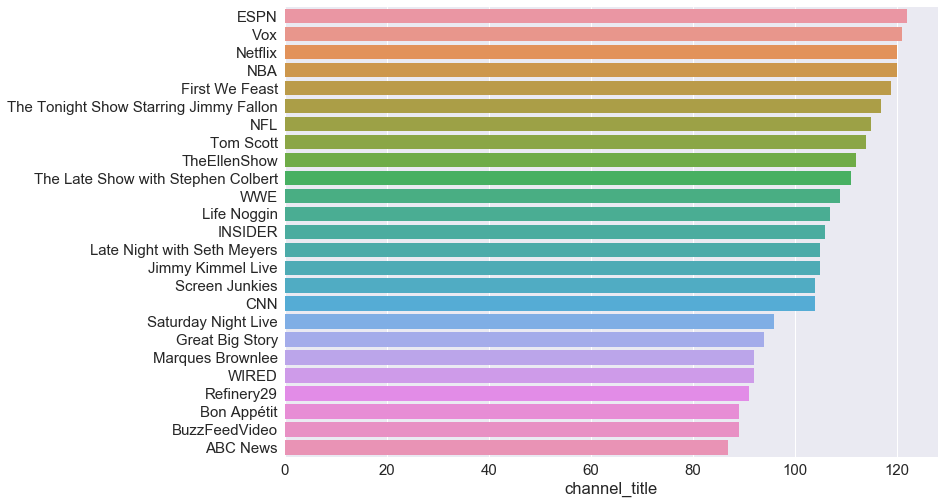

In [31]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = us_videos.channel_title.value_counts()[:25]
_ = sns.barplot(y=tmp.index,x=tmp)
plt.show()

#### Video Category Distribution

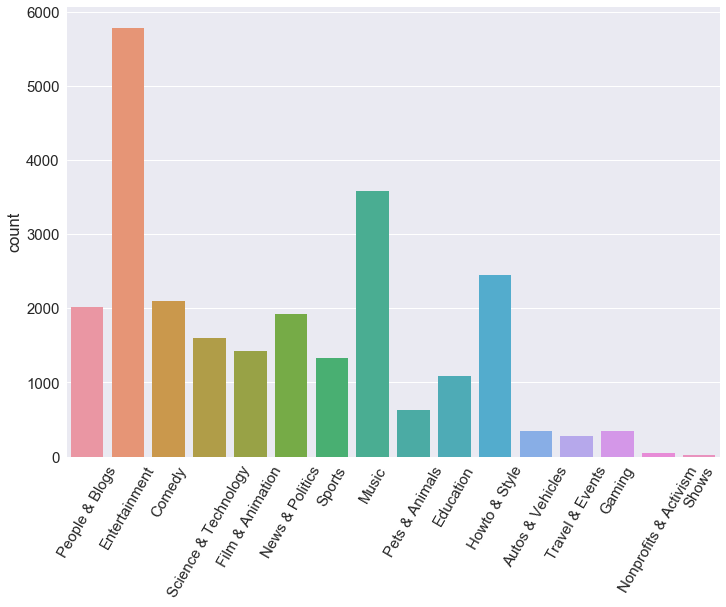

In [33]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
sns_ax = sns.countplot([categories[i] for i in us_videos.category_id])
_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=60)
plt.show()

C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  """Entry point for launching an IPython kernel.


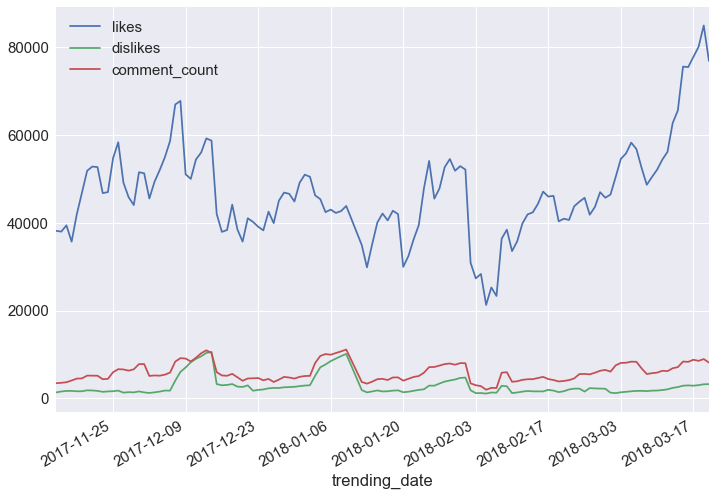

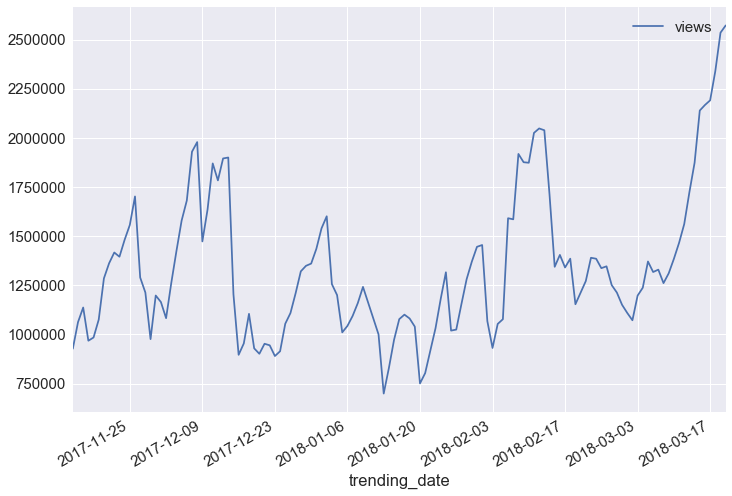

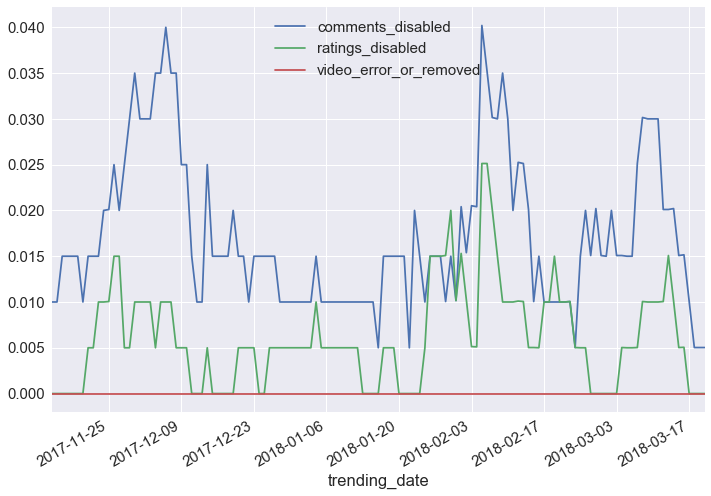

In [34]:
table = pd.pivot_table(us_videos, index=us_videos.index.labels[0])
table.index = us_videos.index.levels[0]
_ = table[['likes','dislikes','comment_count']].plot()
_ = table[['views']].plot()
_ = table[['comments_disabled','ratings_disabled','video_error_or_removed']].plot()
plt.show()

#### Days to Treding Status

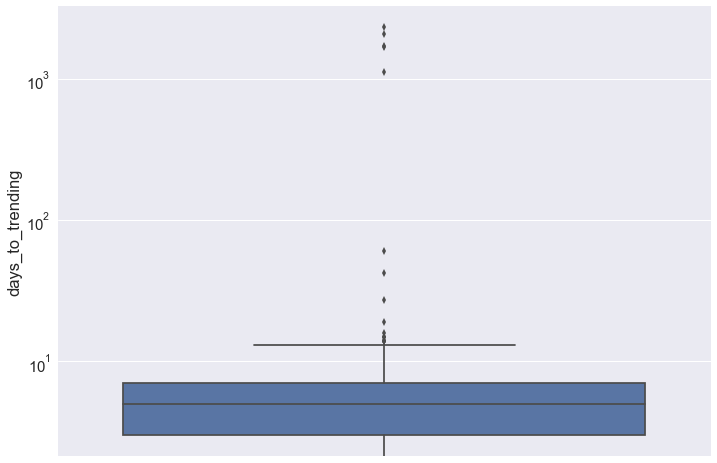

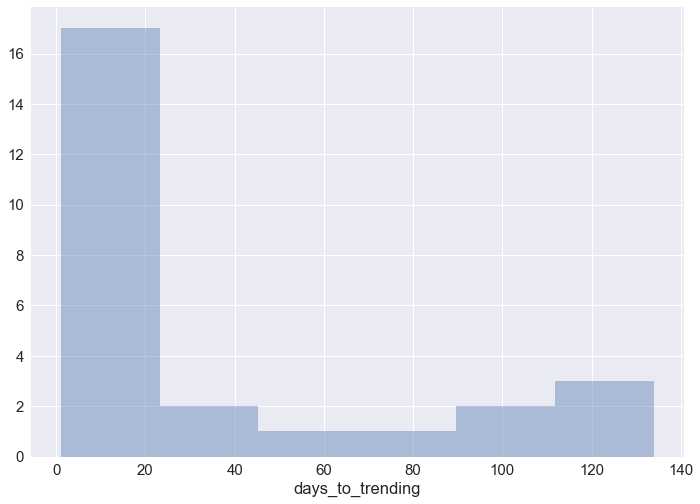

In [35]:
max_days_to_trending = us_videos.sample(1000).groupby('video_id').days_to_trending.max() # Notice Sampling: EDA Principle 3
sns_ax = sns.boxplot(y=max_days_to_trending)
_ = sns_ax.set(yscale="log")
plt.show()
_ = sns.distplot(max_days_to_trending.value_counts(),bins='rice',kde=False)
plt.show()

#### Like & Dislikes

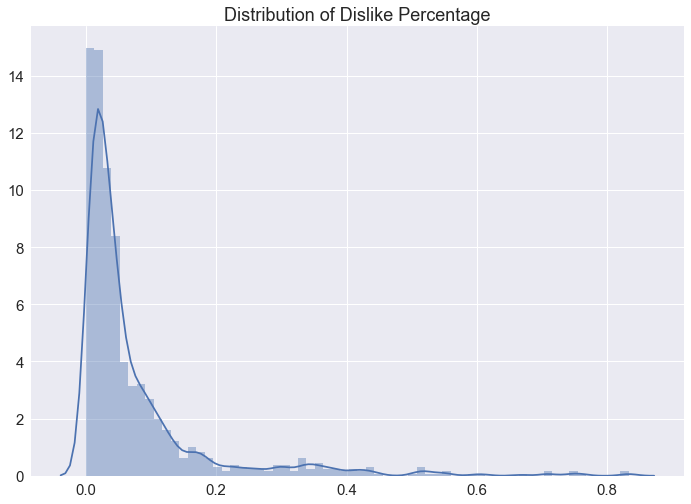

In [36]:
sns_ax = sns.distplot(np.nan_to_num(us_videos.sample(1000).dislike_percentage),bins='fd')  # Notice Sampling: EDA Principle 3
_ = sns_ax.set_title('Distribution of Dislike Percentage')
plt.show()

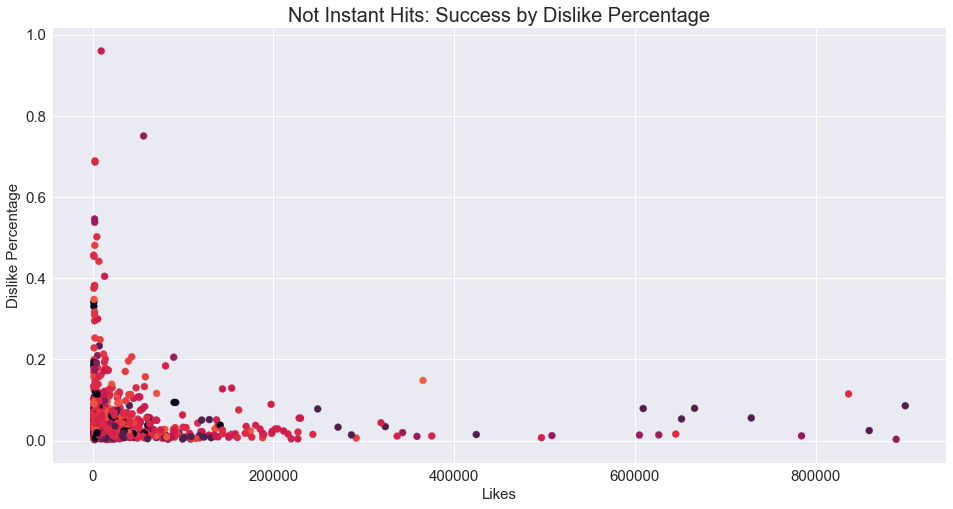

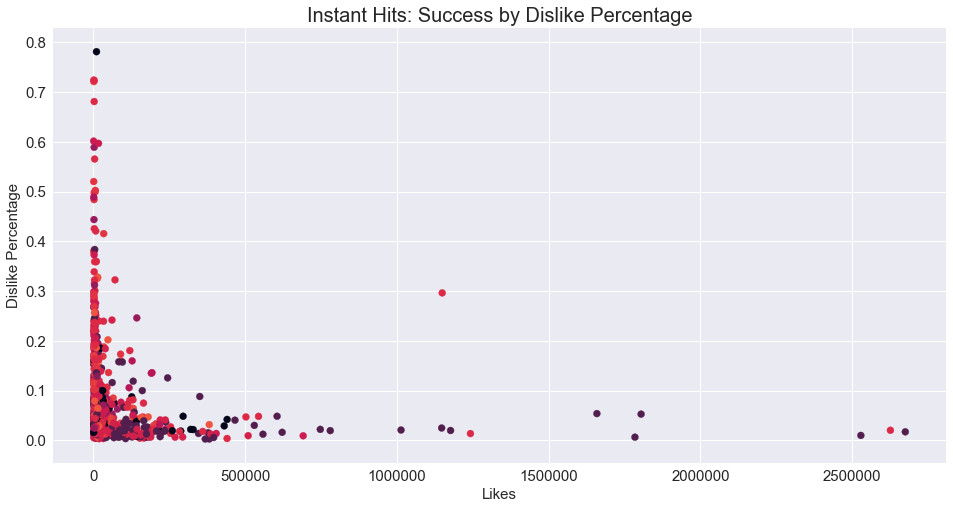

In [37]:
plt.figure(figsize=(16,8))
plt.title('Not Instant Hits: Success by Dislike Percentage', fontsize=20)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislike Percentage', fontsize=15)

min_days_to_trending = us_videos.groupby(level=1).days_to_trending.min()
videos_passing_test = us_videos.index.get_level_values('video_id').isin(min_days_to_trending[min_days_to_trending > 1].index)
tmp = us_videos[(videos_passing_test) & (us_videos.likes > 1000)].sample(1000)
plt.scatter(tmp.likes, tmp.dislike_percentage, c=tmp.category_id)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Instant Hits: Success by Dislike Percentage', fontsize=20)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislike Percentage', fontsize=15)
tmp = us_videos[us_videos.index.get_level_values('video_id'). \
                isin(min_days_to_trending[min_days_to_trending <= 1].index) & (us_videos.likes > 1000)].sample(1000)
plt.scatter(tmp.likes, tmp.dislike_percentage, c=tmp.category_id)
plt.show()


#### Video Level Pair Plots

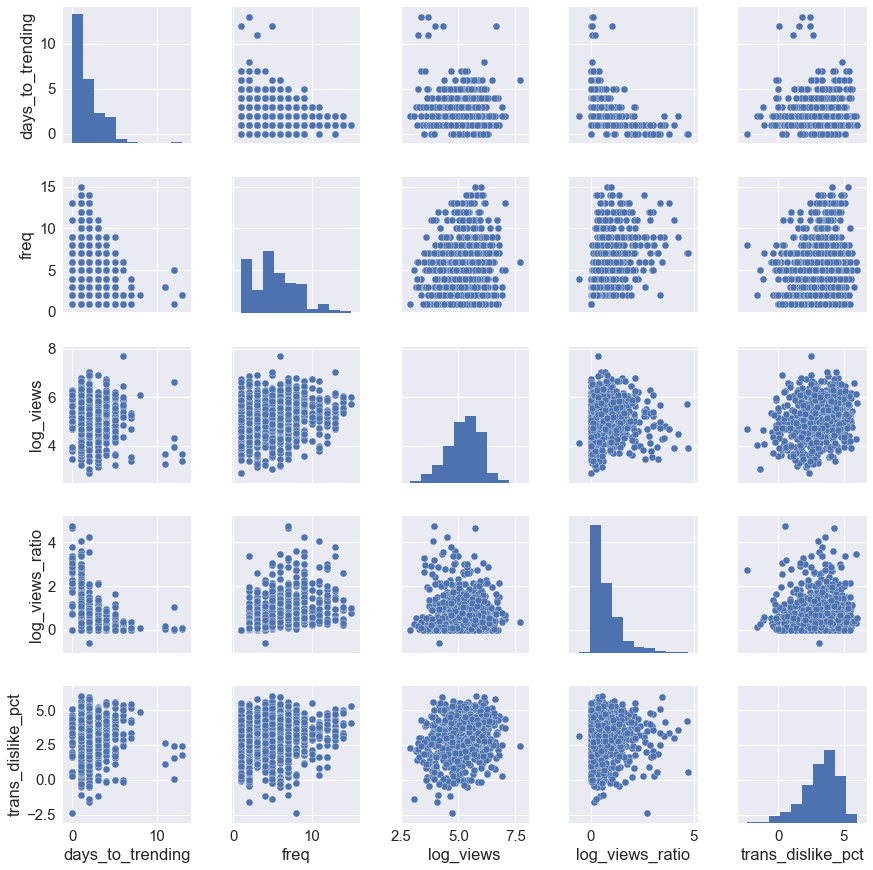

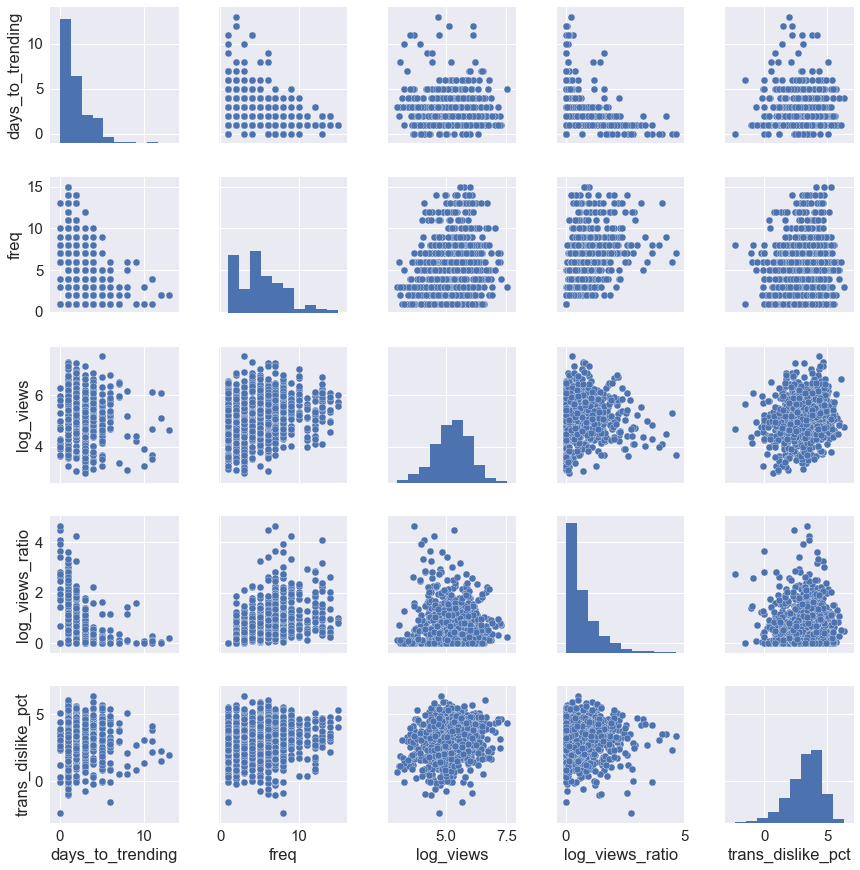

In [39]:
tmp = video_level.sample(1000)[['days_to_trending','dislike_percentage','likes','dislikes','views','views_ratio','freq']] # Notice Sampling: EDA Principle 3
tmp = tmp[tmp.days_to_trending < 20]
tmp['log_views'] = np.log10(tmp.views)
tmp['trans_dislike_pct'] = np.log(tmp.likes+1) - np.log(tmp.dislikes+1)
tmp['log_views_ratio'] = np.log(tmp.views_ratio)
_ = sns.pairplot(tmp[['days_to_trending','freq','log_views','log_views_ratio','trans_dislike_pct']],dropna=True)
plt.show()

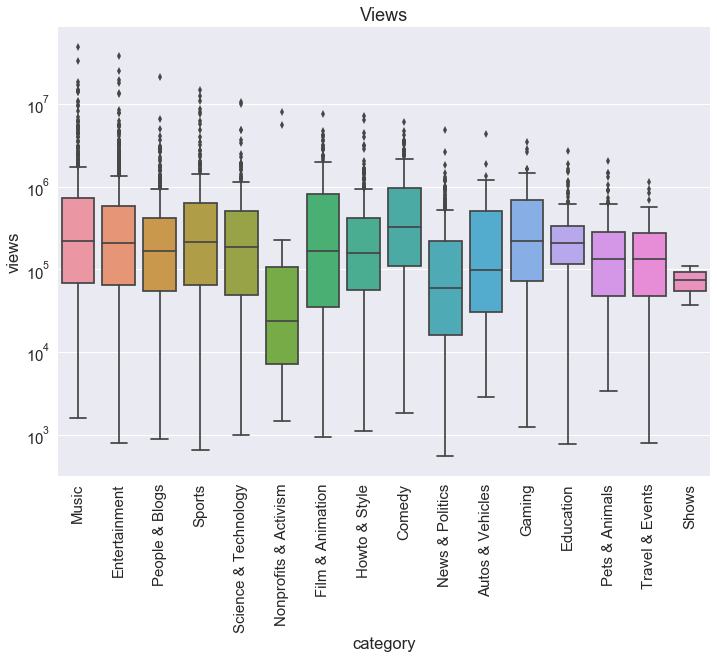

In [40]:
sns_ax = sns.boxplot(x='category',y='views',data=video_level)
_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=90)
_ = sns_ax.set_title('Views')
_ = sns_ax.set(yscale="log")
plt.show()

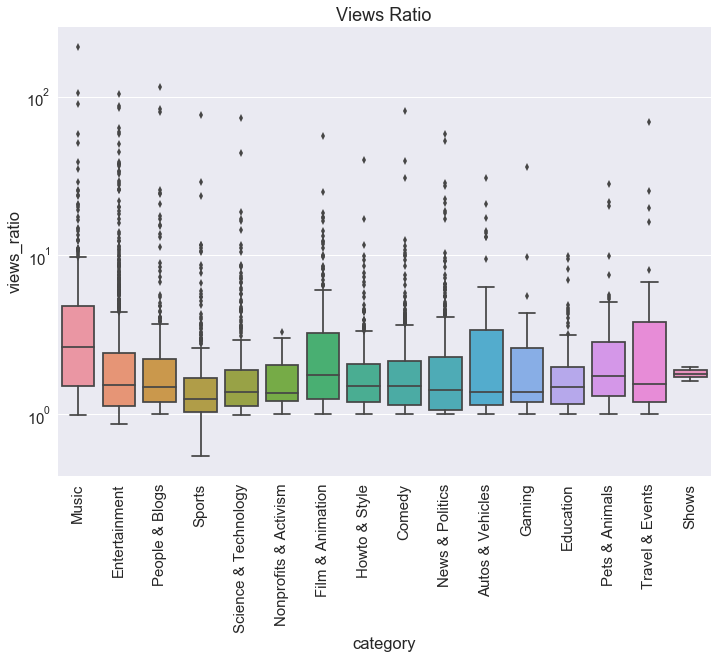

In [41]:
sns_ax = sns.boxplot(x='category',y='views_ratio',data=video_level)
_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=90)
_ = sns_ax.set_title('Views Ratio')
_ = sns_ax.set(yscale="log")
plt.show()

In [44]:
tmp = video_level[(video_level.views_ratio < 10) & (video_level.freq > 1) & (video_level.views_ratio > .8)].dropna().sort_values(by='views_ratio')
cat_ratio_median = tmp.groupby('category')['views_ratio'].median()
tmp = tmp.merge(cat_ratio_median.rename('cat_ratio_median').to_frame(), left_on='category',right_index=True)

y = np.log(tmp.views_ratio)
print('y')
print(y.describe(percentiles=[.05,.25,.5,.75,.95]))
X = tmp[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median']]


tmp_log = np.log(tmp[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median','views_ratio']]+1)
X_reg = tmp_log[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median']]
y_reg = tmp_log.views_ratio
print('y_reg')
print(y_reg.describe(percentiles=[.05,.25,.5,.75,.95]))

y
count    3998.000000
mean        0.658749
std         0.527000
min        -0.135237
5%          0.064445
25%         0.242090
50%         0.514764
75%         0.945454
95%         1.765301
max         2.298001
Name: views_ratio, dtype: float64
y_reg
count    3998.000000
mean        1.104686
std         0.373571
min         0.627813
5%          0.725889
25%         0.821500
50%         0.983292
75%         1.273680
95%         1.923275
max         2.393729
Name: views_ratio, dtype: float64


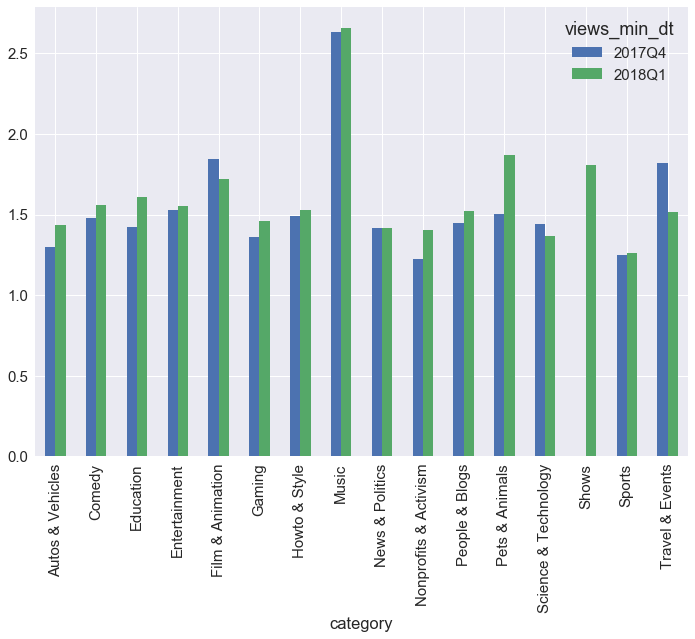

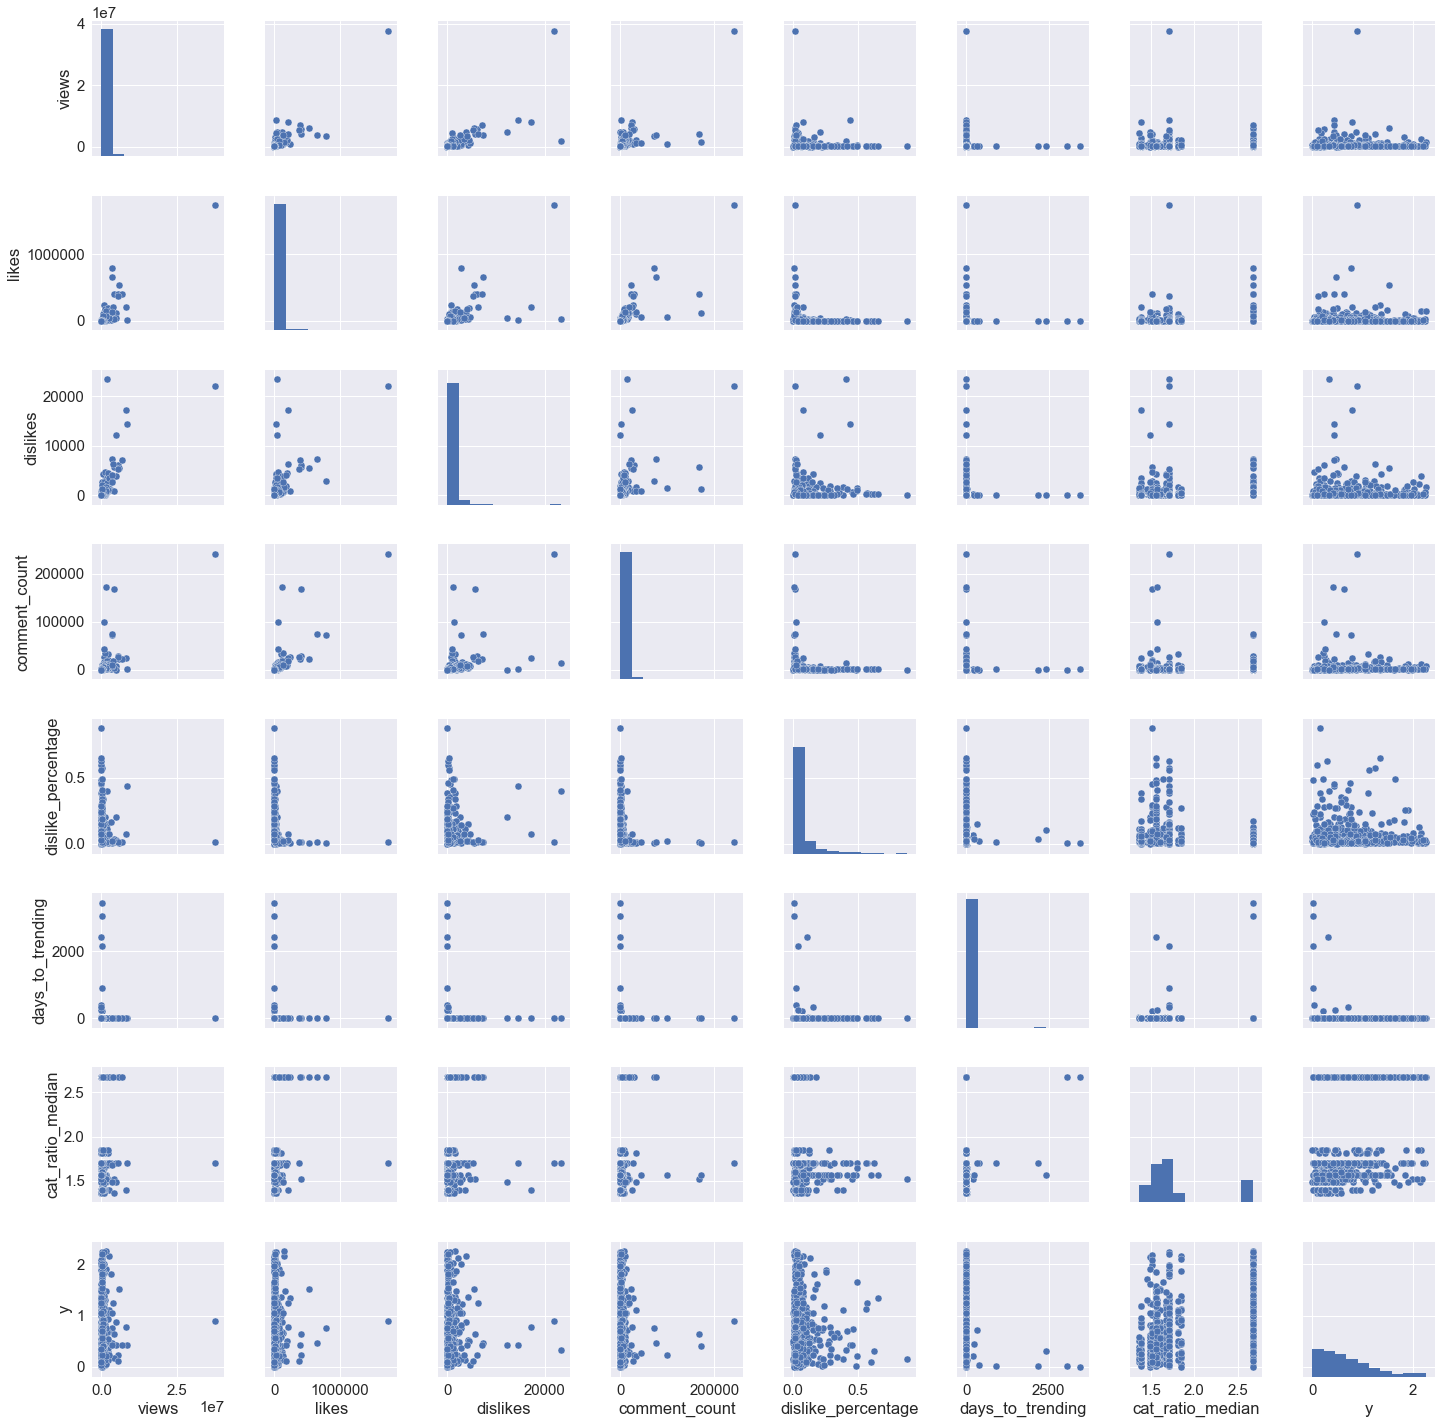

In [45]:
_ = sns.pairplot(pd.concat((X,y.rename('y')),axis=1).sample(500)) # Notice Sampling: EDA Principle 3
plt.show()

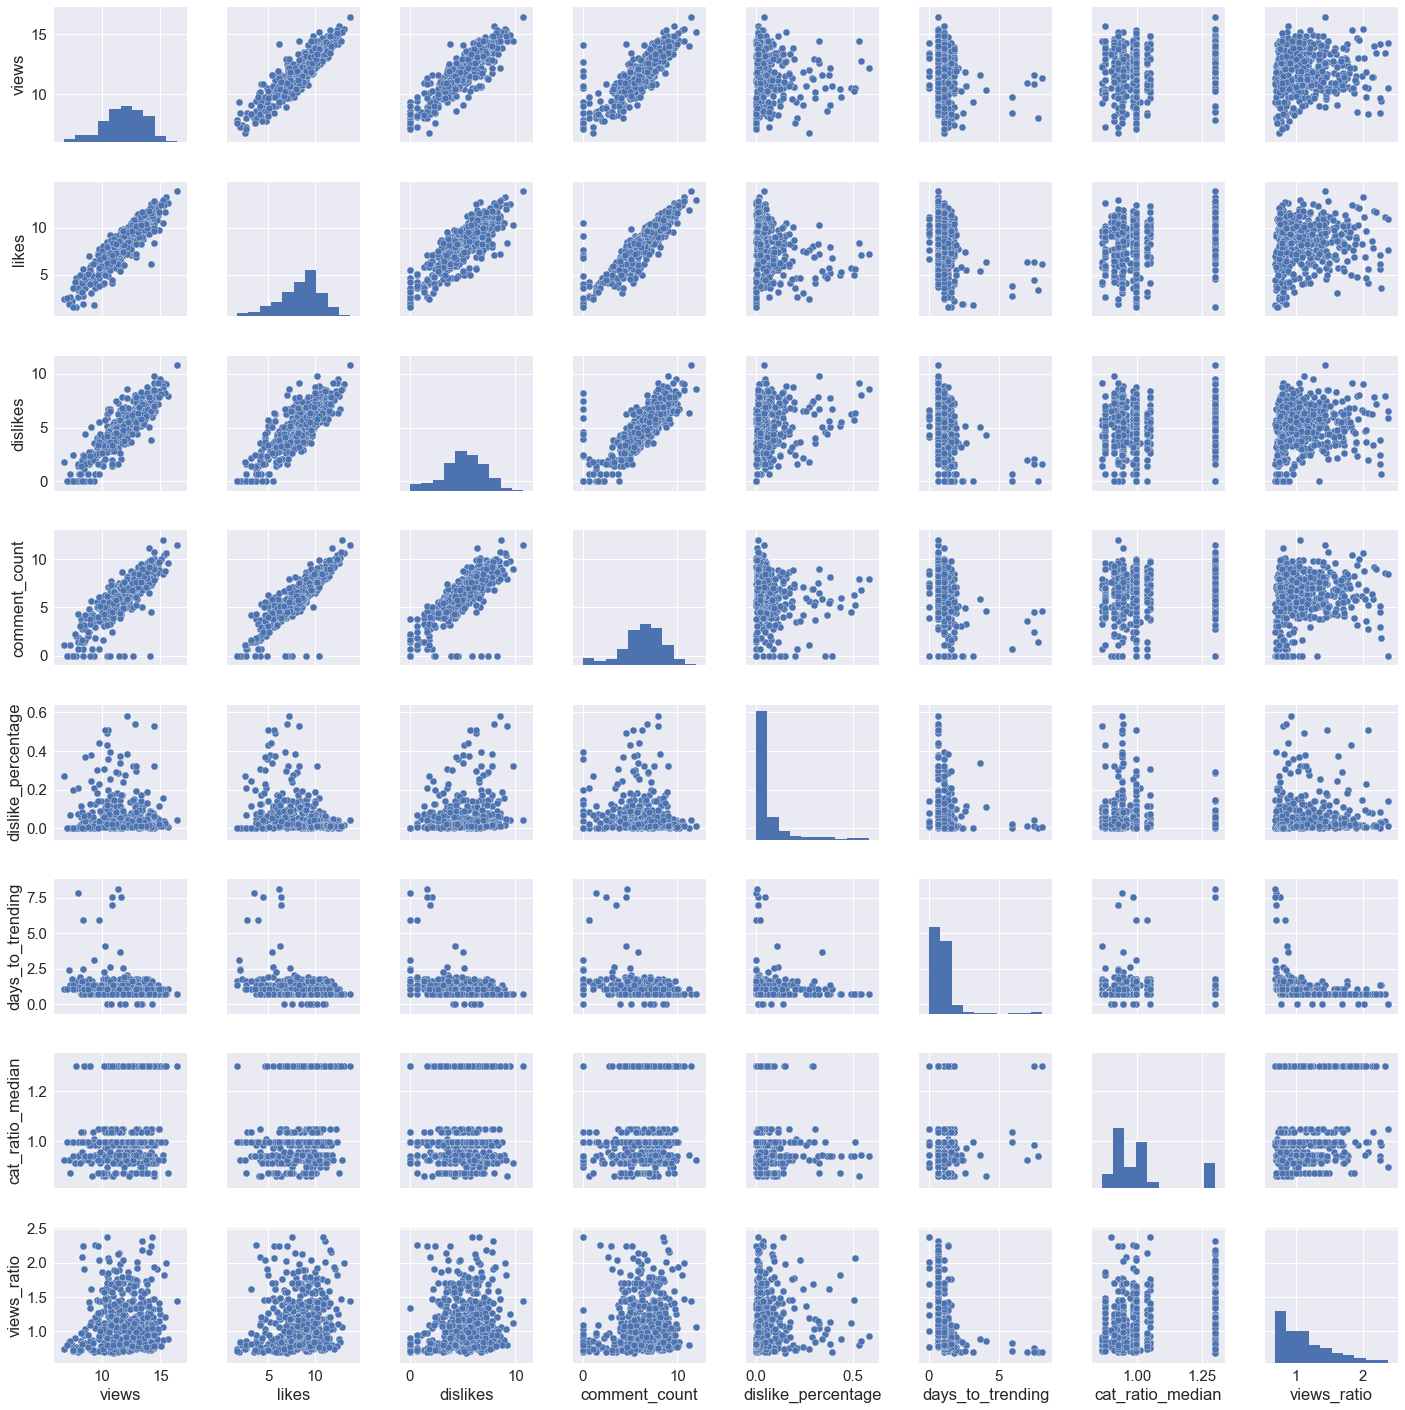

In [46]:
_ = sns.pairplot(tmp_log.sample(500))  # Notice Sampling: EDA Principle 3
plt.show()

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lars, Ridge


regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_leaf=.01)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=.01)
regr_ols = LinearRegression()
regr_lrs = Lars()
regr_rdg = Ridge (alpha = .5)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_ols.fit(X_reg, y_reg)
regr_lrs.fit(X_reg, y_reg)
regr_rdg.fit(X_reg, y_reg)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_ols = regr_ols.predict(X_reg)
y_lrs = regr_lrs.predict(X_reg)
y_rdg = regr_rdg.predict(X_reg)

print((y_1 - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Regression Tree 1: R-sq = {:.2%}'.format(metrics.r2_score(y,y_1)))


print((y_ols - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('OLS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_ols)))



print((y_lrs - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('LARS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_lrs)))



print((y_rdg - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Ridge Regression: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_rdg)))

count    3.998000e+03
mean    -2.305004e-16
std      4.314038e-01
min     -1.932988e+00
5%      -8.784139e-01
25%     -1.977980e-01
50%      1.054370e-01
75%      2.703955e-01
95%      5.547882e-01
max      1.050074e+00
Name: views_ratio, dtype: float64
Regression Tree 1: R-sq = 32.99%
count    3998.000000
mean        0.445937
std         0.476703
min        -1.841848
5%         -0.531566
25%         0.185311
50%         0.572762
75%         0.803133
95%         0.995529
max         1.344584
Name: views_ratio, dtype: float64
OLS: R-sq = 18.94%
count    3998.000000
mean        0.445937
std         0.476427
min        -1.838223
5%         -0.527577
25%         0.186203
50%         0.573863
75%         0.802189
95%         0.996958
max         1.355234
Name: views_ratio, dtype: float64
LARS: R-sq = 18.87%
count    3998.000000
mean        0.445937
std         0.476788
min        -1.841747
5%         -0.530360
25%         0.185708
50%         0.573197
75%         0.803154
95%         0.9958

### RESULT
The first regression tree, regr_1, captures the main result. The key variable is days_to_treding, the lower it is the higher the expected views ratio (increase). For instant hits (days_to_trending <= 1) category is an additional predictor of future success, namely if a video belongs to the categories: "Film & Animation" or "Music."

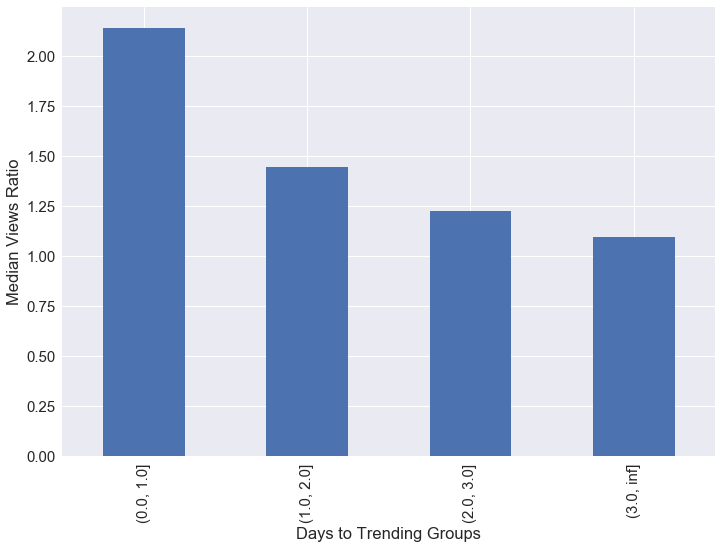

In [55]:
days_to_trending_cat = pd.cut(video_level.days_to_trending,[0,1,2,3,np.inf])
ax = video_level.groupby(days_to_trending_cat)['views_ratio'].median().plot(kind='bar')
_ = ax.set(ylabel="Median Views Ratio",xlabel="Days to Trending Groups")
plt.show()

In [56]:
# Categories with High Median Views Ratio
cat_ratio_median[cat_ratio_median > 1.837]

category
Film & Animation    1.853835
Music               2.674374
Name: views_ratio, dtype: float64